In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
import shap

c:\Users\admin\.conda\envs\pyt3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\admin\.conda\envs\pyt3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

In [2]:
# Load the data
data = pd.read_excel('A549&hSPC_4param.xls')
values = data.values
print(values.size)
X = values[:,0:4] # input
y = values[:,4]-1 # target, change labels into 0 and 1
print(y.size)

5165
1033


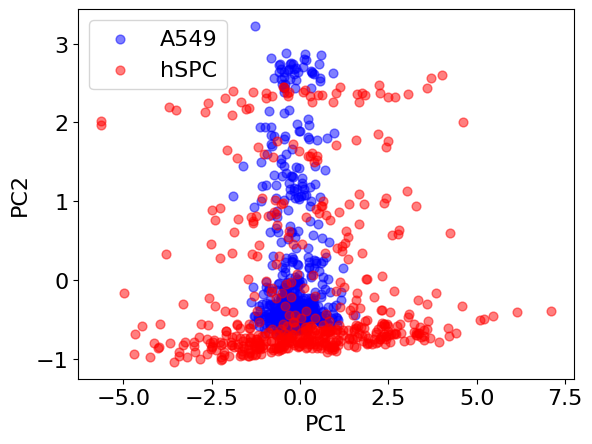

In [3]:
## Principal component analysis (PCA)
# Standardize features
X_ss = StandardScaler().fit_transform(X)
# Perform PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_ss)
# Create a new DataFrame with principal components
df_pc = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
# Concatenate with target variable
df_pc_targ = pd.concat([df_pc, pd.DataFrame(y, columns=['Target'])], axis=1)
# Plot PCA
plt.rcParams.update({'font.size': 16})
targets = np.unique(y)
colors = ['b','r', 'g', 'b', 'y']
for target, color in zip(targets, colors):
    indices_to_keep = df_pc_targ['Target'] == target
    plt.scatter(df_pc_targ.loc[indices_to_keep, 'PC1'],
                df_pc_targ.loc[indices_to_keep, 'PC2'],
                c=color, s=40, alpha=0.5,)
plt.legend(['A549', 'hSPC'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('./results_A549_hSPC/pca.jpg', dpi=300, bbox_inches='tight')
plt.show()

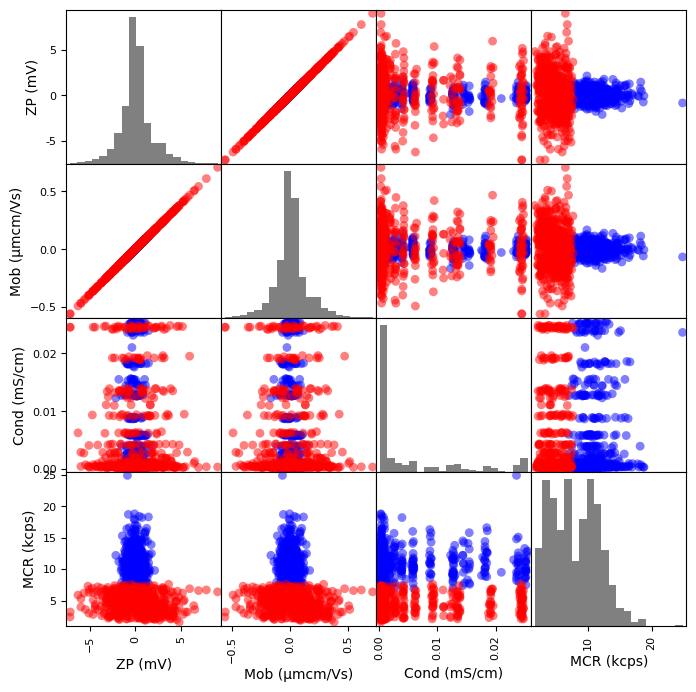

In [4]:
# Select the variables to include in the scatter matrix plot
vars_to_plot = ['ZP (mV)', 'Mob (μmcm/Vs)', 'Cond (mS/cm)', 'MCR (kcps)']
df = pd.DataFrame(X, columns=vars_to_plot)
# Create the scatter matrix plot
plt.rcParams.update({'font.size': 10})
scatter_matrix(df, c=y, figsize=(8, 8), marker='o', hist_kwds={'bins':20, 'color': 'gray'}, s=40, alpha=0.5, cmap='bwr')
plt.savefig('./results_A549_hSPC/scatter_matrix.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Create the models
model_LR = LogisticRegression(solver='saga', max_iter=1000)
model_SVM = SVC(probability=True)
model_kNN = KNeighborsClassifier(n_neighbors=3)
model_DT = DecisionTreeClassifier(min_samples_leaf=5, max_depth=5)
model_XGB = XGBClassifier()
# model_RFC = RandomForestClassifier(n_estimators=100)

In [7]:
# Perform 200-fold cross-validation
cv_num = 10
accu_train_LR = cross_val_score(model_LR, X_train, y_train, cv=cv_num)
accu_train_SVM = cross_val_score(model_SVM, X_train, y_train, cv=cv_num)
accu_train_kNN = cross_val_score(model_kNN, X_train, y_train, cv=cv_num)
accu_train_DT = cross_val_score(model_DT, X_train, y_train, cv=cv_num)
accu_train_XGB = cross_val_score(model_XGB, X_train, y_train, cv=cv_num)
# score_RFC = cross_val_score(model_RFC, X_train, y_train, cv=200)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


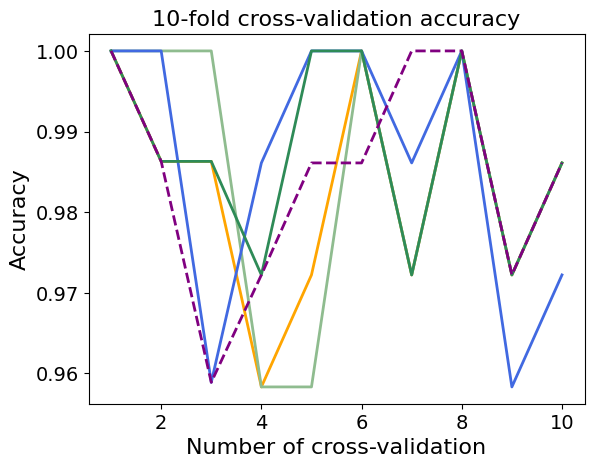

In [8]:
# Plotting the curves of cross-validation
plt.rcParams.update({'font.size': 16})
cvx = np.arange(1, cv_num+1, 1)
plt.plot(cvx, accu_train_LR, lw=2, color='orange')
plt.plot(cvx, accu_train_SVM, lw=2, color='darkseagreen')
plt.plot(cvx, accu_train_kNN, lw=2, color='royalblue')
plt.plot(cvx, accu_train_DT, lw=2, color='seagreen')
plt.plot(cvx, accu_train_XGB, lw=2, linestyle='--', color='purple')
plt.xticks(fontsize=14)
plt.xlabel('Number of cross-validation', fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel('Accuracy', fontsize=16)
plt.title(str(cv_num)+'-fold cross-validation accuracy', fontsize=16)
plt.savefig('./results/cross_validation_curve_fold_'+str(cv_num)+'.jpg', dpi=300, bbox_inches='tight')
plt.show()

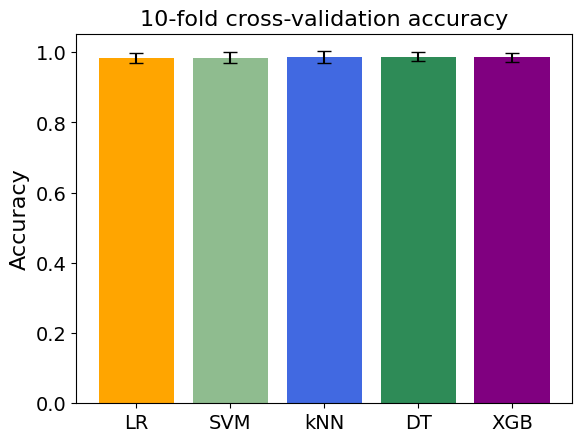

Accuracy of LR: 0.9833713850837137 0.013616254093591167
Accuracy of SVM: 0.9847222222222222 0.0169535494662968
Accuracy of kNN: 0.9861681887366819 0.016337688633792497
Accuracy of DT: 0.9875380517503805 0.011532646889941073
Accuracy of XGB: 0.9847983257229831 0.012990493633042915


In [9]:
# Bar chart of 200-fold cross-validation accuracy
barx_val = ['LR', 'SVM', 'kNN', 'DT', 'XGB']
bary_val = [np.mean(accu_train_LR), np.mean(accu_train_SVM), np.mean(accu_train_kNN), np.mean(accu_train_DT), np.mean(accu_train_XGB)]
bary_std = [np.std(accu_train_LR), np.std(accu_train_SVM), np.std(accu_train_kNN), np.std(accu_train_DT), np.std(accu_train_XGB)]

plt.rcParams.update({'font.size': 16})
color = ['orange', 'darkseagreen', 'royalblue', 'seagreen', 'purple']
plt.bar(barx_val, bary_val, yerr = bary_std, capsize=5, color=color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Accuracy', fontsize=16)
plt.title(str(cv_num)+'-fold cross-validation accuracy', fontsize=16)
plt.savefig('./results/cross_validation_bar_fold_'+str(cv_num)+'.jpg', dpi=300, bbox_inches='tight')
plt.show()

print('Accuracy of LR:', np.mean(accu_train_LR), np.std(accu_train_LR))
print('Accuracy of SVM:', np.mean(accu_train_SVM), np.std(accu_train_SVM))
print('Accuracy of kNN:', np.mean(accu_train_kNN), np.std(accu_train_kNN))
print('Accuracy of DT:', np.mean(accu_train_DT), np.std(accu_train_DT))
print('Accuracy of XGB:', np.mean(accu_train_XGB), np.std(accu_train_XGB))
# print('Score of RFC:', np.mean(score_RFC))

In [10]:
# Train the best models
model_LR.fit(X_train, y_train)
model_SVM.fit(X_train, y_train)
model_kNN.fit(X_train, y_train)
model_DT.fit(X_train, y_train)
model_XGB.fit(X_train, y_train)
# model_RFC.fit(X_train, y_train)

The max_iter was reached which means the coef_ did not converge


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


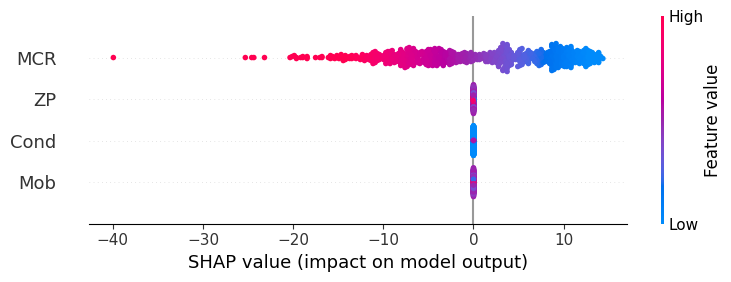

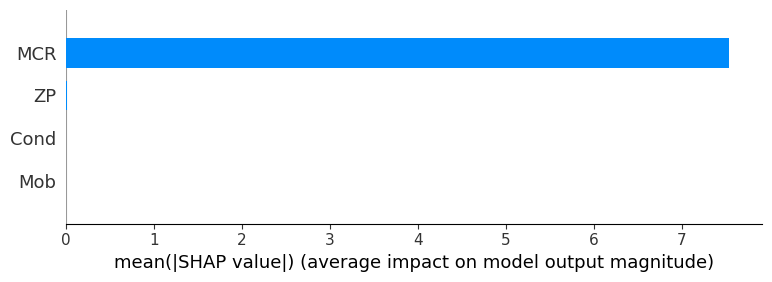

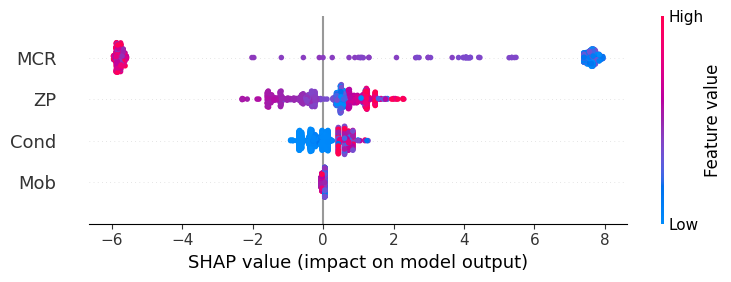

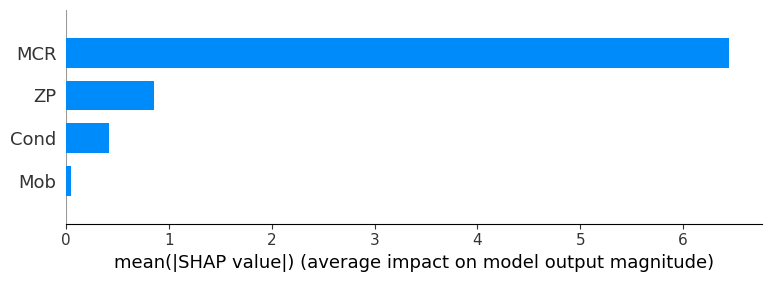

In [11]:
# Create an explainer object
# LR
explainer = shap.Explainer(model_LR, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=["ZP", "Mob", "Cond", "MCR"])
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=["ZP", "Mob", "Cond", "MCR"])
# # SVM
# explainer = shap.Explainer(model_SVM, X_train)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train, feature_names=["ZP", "Mob", "Cond", "MCR"])
# shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=["ZP", "Mob", "Cond", "MCR"])
# # kNN
# explainer = shap.Explainer(model_kNN, X_train)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train, feature_names=["ZP", "Mob", "Cond", "MCR"])
# shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=["ZP", "Mob", "Cond", "MCR"])
# # DT
# explainer = shap.Explainer(model_DT, X_train)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train, feature_names=["ZP", "Mob", "Cond", "MCR"])
# shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=["ZP", "Mob", "Cond", "MCR"])
# XGB
explainer = shap.Explainer(model_XGB, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=["ZP", "Mob", "Cond", "MCR"])
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=["ZP", "Mob", "Cond", "MCR"])

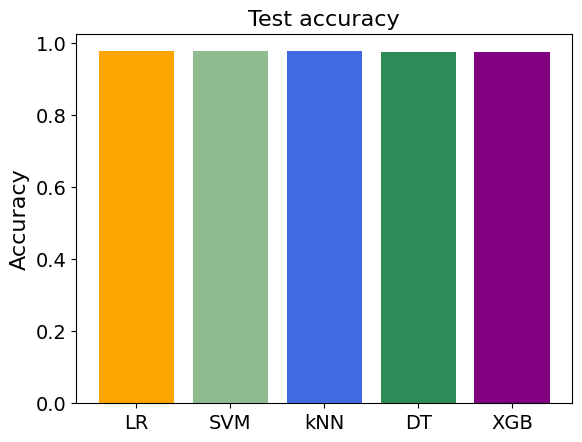

Accuracy of LR: 0.9774193548387097
Accuracy of SVC: 0.9774193548387097
Accuracy of kNN: 0.9774193548387097
Accuracy of DT: 0.9741935483870968
Accuracy of XGB: 0.9741935483870968


In [12]:
# Use the model to make predictions
y_pred_LR = model_LR.predict(X_test)
y_pred_SVM = model_SVM.predict(X_test)
y_pred_kNN = model_kNN.predict(X_test)
y_pred_DT = model_DT.predict(X_test)
y_pred_XGB = model_XGB.predict(X_test)
# y_pred_RFC = model_RFC.predict(X_test)

# Evaluate the model
accu_test_LR = (y_pred_LR == y_test).sum() / len(y_test)
accu_test_SVM = (y_pred_SVM == y_test).sum() / len(y_test)
accu_test_kNN = (y_pred_kNN == y_test).sum() / len(y_test)
accu_test_DT = (y_pred_DT == y_test).sum() / len(y_test)
accu_test_XGB = (y_pred_XGB == y_test).sum() / len(y_test)
# accuracy_RFC = (y_pred_RFC == y_test).sum() / len(y_test)

# Bar chart of test accuracy
barx_test = ['LR', 'SVM', 'kNN', 'DT', 'XGB']
bary_test = [accu_test_LR, accu_test_SVM, accu_test_kNN, accu_test_DT, accu_test_XGB]
plt.rcParams.update({'font.size': 16})
color = ['orange', 'darkseagreen', 'royalblue', 'seagreen', 'purple']
plt.bar(barx_test, bary_test, color=color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Test accuracy', fontsize=16)
plt.savefig('./results/text_bar.jpg', dpi=300, bbox_inches='tight')
plt.show()

print('Accuracy of LR:', model_LR.score(X_test,y_test))
print('Accuracy of SVC:', model_SVM.score(X_test,y_test))
print('Accuracy of kNN:', model_kNN.score(X_test,y_test))
print('Accuracy of DT:', model_DT.score(X_test,y_test))
print('Accuracy of XGB:', model_XGB.score(X_test,y_test))
# print('Accuracy of RFC:', model_RFC.score(X_test,y_test))

In [13]:
# Create a sample confusion matrix
def plot_confusion_matrix(y_true, y_pred, ax, labels, title):
    
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    im = ax.imshow(cm, cmap='Blues')

    # Add labels and colorbar
    ax.set_xticks(np.arange(len(cm)))
    ax.set_yticks(np.arange(len(cm)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title)
    plt.colorbar(im)

    # Add annotations
    thresh = cm.max() / 2.
    for i in range(len(cm)):
        for j in range(len(cm)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

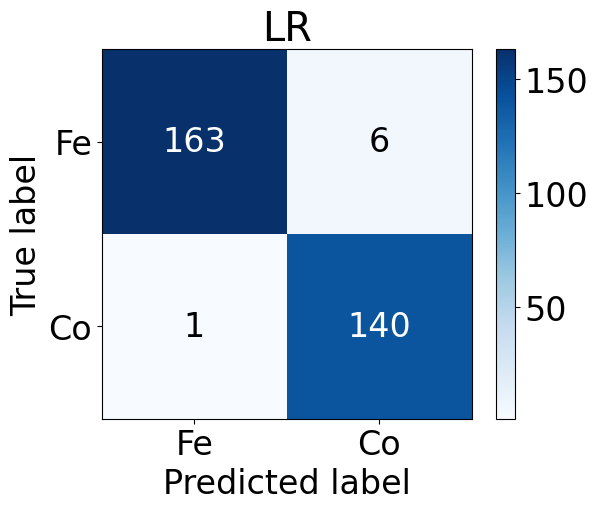

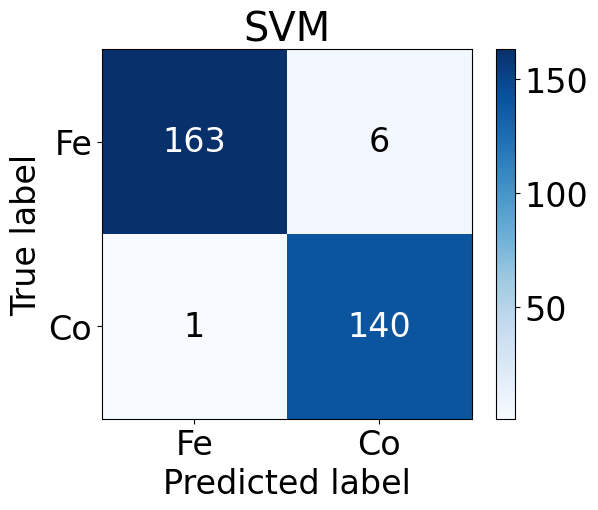

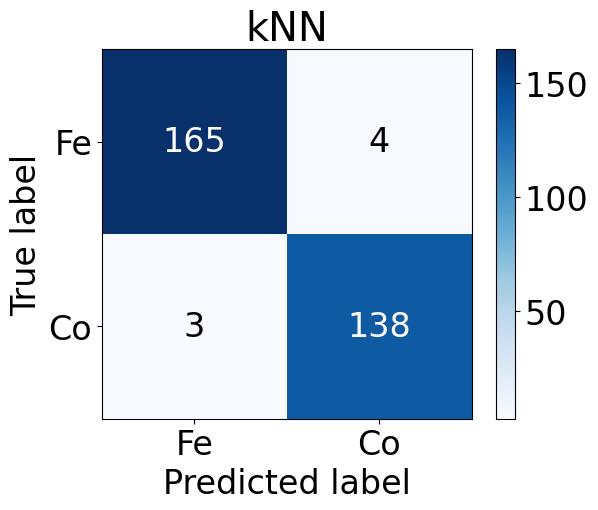

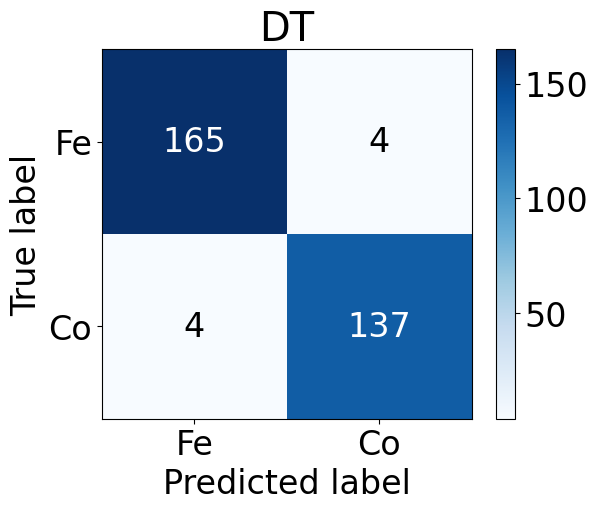

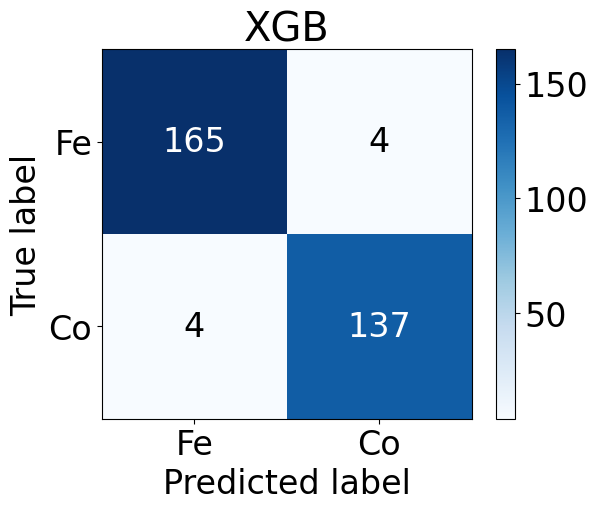

In [14]:
# Create a grid of subplots
plt.rcParams.update({'font.size': 24})
plt.figure()
ax1 = plt.subplot(1,1,1)
plot_confusion_matrix(y_test, y_pred_LR, ax1, ['Fe', 'Co'], 'LR')
plt.savefig('./results/confusion_matrix_lr.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.figure()
ax2 = plt.subplot(1,1,1)
plot_confusion_matrix(y_test, y_pred_SVM, ax2, ['Fe', 'Co'], 'SVM')
plt.savefig('./results/confusion_matrix_svm.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.figure()
ax3 = plt.subplot(1,1,1)
plot_confusion_matrix(y_test, y_pred_kNN, ax3, ['Fe', 'Co'], 'kNN')
plt.savefig('./results/confusion_matrix_knn.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.figure()
ax4 = plt.subplot(1,1,1)
plot_confusion_matrix(y_test, y_pred_DT, ax4, ['Fe', 'Co'], 'DT')
plt.savefig('./results/confusion_matrix_dt.jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.figure()
ax5 = plt.subplot(1,1,1)
plot_confusion_matrix(y_test, y_pred_XGB, ax5, ['Fe', 'Co'], 'XGB')
plt.subplots_adjust(wspace=-0.35, hspace=1.25)
plt.savefig('./results/confusion_matrix_xgb.jpg', dpi=300, bbox_inches='tight')
plt.show()

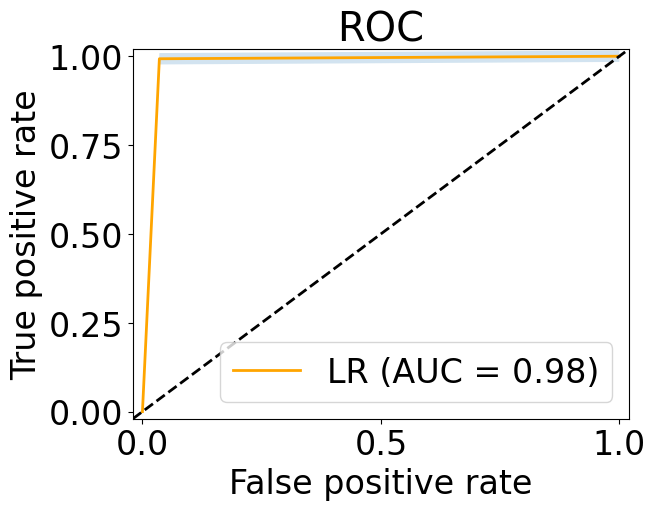

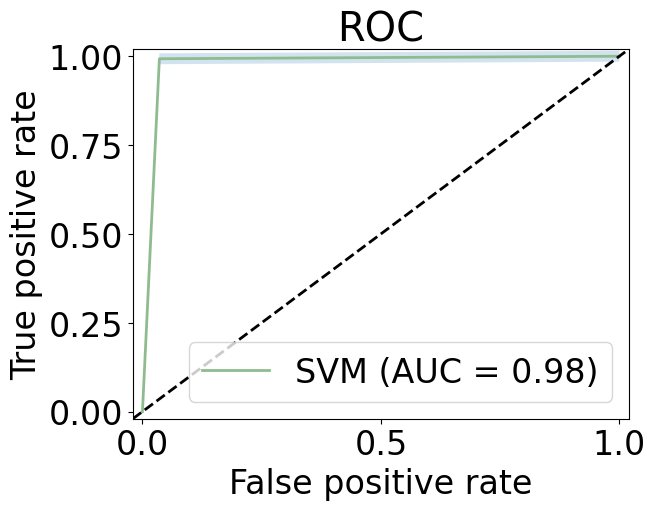

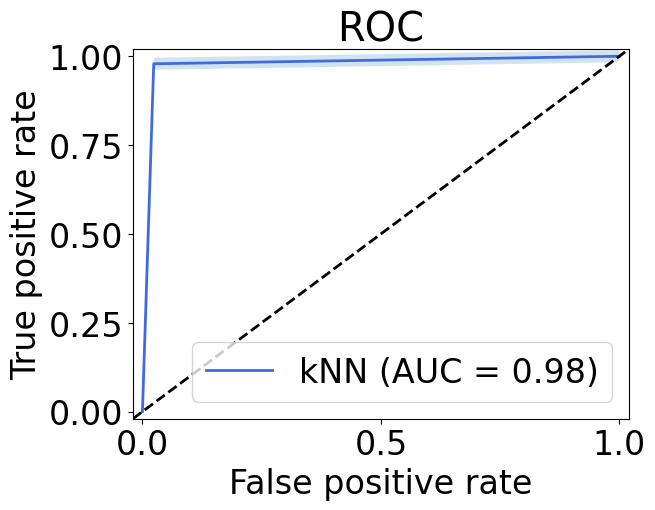

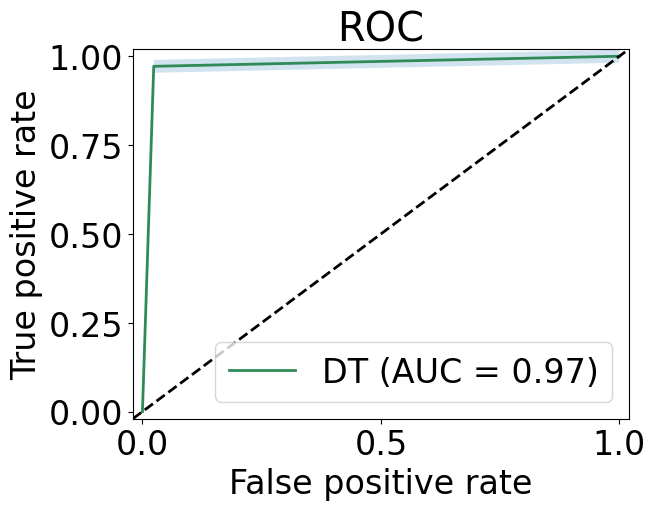

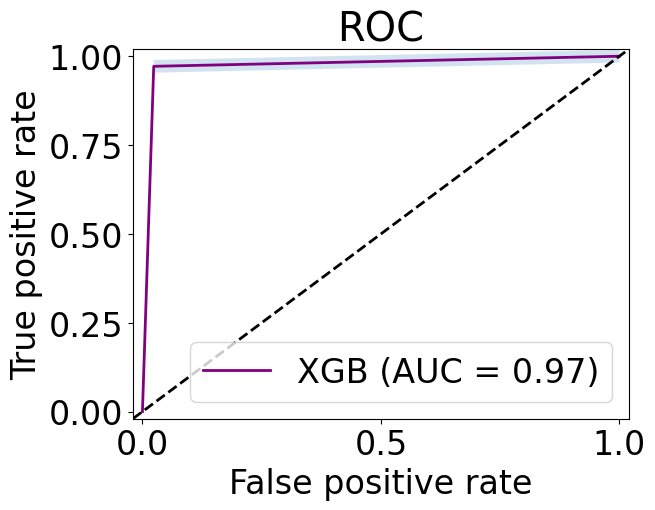

In [15]:
# Compute ROC curve and AUC score
# Plot ROC curve
plt.rcParams.update({'font.size': 24})
# Linear regression
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
# Compute the confidence interval using bootstrapping
n_bootstraps = 1000
bootstrapped_auc = []
for i in range(n_bootstraps):
    # Generate a random sample with replacement
    indices = np.random.randint(0, len(y_test), size=len(y_pred_LR))
    sample_true = y_test[indices]
    sample_score = y_pred_LR[indices]
    # Compute the ROC curve for the sample
    sample_fpr, sample_tpr, sample_thresholds = roc_curve(sample_true, sample_score)
    # Compute the AUC for the sample
    sample_auc = auc(sample_fpr, sample_tpr)
    bootstrapped_auc.append(sample_auc)
# Compute the mean and standard deviation of the bootstrapped AUC values
mean_auc = np.mean(bootstrapped_auc)
std_auc = np.std(bootstrapped_auc)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='orange', lw=2, label='LR (AUC = %0.2f)' % roc_auc_LR)
plt.plot([-0.02, 1.02], [-0.02, 1.02], color='k', lw=2, linestyle='--')
plt.fill_between(fpr_LR, tpr_LR - 1.96 * std_auc, tpr_LR + 1.96 * std_auc, alpha=0.2)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate',)
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('./results/roc_lr.jpg', dpi=300, bbox_inches='tight')
plt.show()
# SVC
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_test, y_pred_SVM)
roc_auc_SVC = auc(fpr_SVC, tpr_SVC)
# Compute the confidence interval using bootstrapping
n_bootstraps = 1000
bootstrapped_auc = []
for i in range(n_bootstraps):
    # Generate a random sample with replacement
    indices = np.random.randint(0, len(y_test), size=len(y_pred_SVM))
    sample_true = y_test[indices]
    sample_score = y_pred_SVM[indices]
    # Compute the ROC curve for the sample
    sample_fpr, sample_tpr, sample_thresholds = roc_curve(sample_true, sample_score)
    # Compute the AUC for the sample
    sample_auc = auc(sample_fpr, sample_tpr)
    bootstrapped_auc.append(sample_auc)
# Compute the mean and standard deviation of the bootstrapped AUC values
mean_auc = np.mean(bootstrapped_auc)
std_auc = np.std(bootstrapped_auc)
plt.figure()
plt.plot(fpr_SVC, tpr_SVC, color='darkseagreen', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_SVC)
plt.plot([-0.02, 1.02], [-0.02, 1.02], color='k', lw=2, linestyle='--')
plt.fill_between(fpr_SVC, tpr_SVC - 1.96 * std_auc, tpr_SVC + 1.96 * std_auc, alpha=0.2)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('./results/roc_svm.jpg', dpi=300, bbox_inches='tight')
plt.show()
# kNN
fpr_kNN, tpr_kNN, thresholds_kNN = roc_curve(y_test, y_pred_kNN)
roc_auc_kNN = auc(fpr_kNN, tpr_kNN)
# Compute the confidence interval using bootstrapping
n_bootstraps = 1000
bootstrapped_auc = []
for i in range(n_bootstraps):
    # Generate a random sample with replacement
    indices = np.random.randint(0, len(y_test), size=len(y_pred_kNN))
    sample_true = y_test[indices]
    sample_score = y_pred_kNN[indices]
    # Compute the ROC curve for the sample
    sample_fpr, sample_tpr, sample_thresholds = roc_curve(sample_true, sample_score)
    # Compute the AUC for the sample
    sample_auc = auc(sample_fpr, sample_tpr)
    bootstrapped_auc.append(sample_auc)
# Compute the mean and standard deviation of the bootstrapped AUC values
mean_auc = np.mean(bootstrapped_auc)
std_auc = np.std(bootstrapped_auc)
plt.figure()
plt.plot(fpr_kNN, tpr_kNN, color='royalblue', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_kNN)
plt.plot([-0.02, 1.02], [-0.02, 1.02], color='k', lw=2, linestyle='--')
plt.fill_between(fpr_kNN, tpr_kNN - 1.96 * std_auc, tpr_kNN + 1.96 * std_auc, alpha=0.2)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('./results/roc_knn.jpg', dpi=300, bbox_inches='tight')
plt.show()
# DT
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)
# Compute the confidence interval using bootstrapping
n_bootstraps = 1000
bootstrapped_auc = []
for i in range(n_bootstraps):
    # Generate a random sample with replacement
    indices = np.random.randint(0, len(y_test), size=len(y_pred_DT))
    sample_true = y_test[indices]
    sample_score = y_pred_DT[indices]
    # Compute the ROC curve for the sample
    sample_fpr, sample_tpr, sample_thresholds = roc_curve(sample_true, sample_score)
    # Compute the AUC for the sample
    sample_auc = auc(sample_fpr, sample_tpr)
    bootstrapped_auc.append(sample_auc)
# Compute the mean and standard deviation of the bootstrapped AUC values
mean_auc = np.mean(bootstrapped_auc)
std_auc = np.std(bootstrapped_auc)
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='seagreen', lw=2, label='DT (AUC = %0.2f)' % roc_auc_DT)
plt.plot([-0.02, 1.02], [-0.02, 1.02], color='k', lw=2, linestyle='--')
plt.fill_between(fpr_DT, tpr_DT - 1.96 * std_auc, tpr_DT + 1.96 * std_auc, alpha=0.2)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('./results/roc_dt.jpg', dpi=300, bbox_inches='tight')
plt.show()
# XGB
fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test, y_pred_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
# Compute the confidence interval using bootstrapping
n_bootstraps = 1000
bootstrapped_auc = []
for i in range(n_bootstraps):
    # Generate a random sample with replacement
    indices = np.random.randint(0, len(y_test), size=len(y_pred_XGB))
    sample_true = y_test[indices]
    sample_score = y_pred_XGB[indices]
    # Compute the ROC curve for the sample
    sample_fpr, sample_tpr, sample_thresholds = roc_curve(sample_true, sample_score)
    # Compute the AUC for the sample
    sample_auc = auc(sample_fpr, sample_tpr)
    bootstrapped_auc.append(sample_auc)
# Compute the mean and standard deviation of the bootstrapped AUC values
mean_auc = np.mean(bootstrapped_auc)
std_auc = np.std(bootstrapped_auc)
plt.figure()
plt.plot(fpr_XGB, tpr_XGB, color='purple', lw=2, label='XGB (AUC = %0.2f)' % roc_auc_XGB)
plt.plot([-0.02, 1.02], [-0.02, 1.02], color='k', lw=2, linestyle='--')
plt.fill_between(fpr_XGB, tpr_XGB - 1.96 * std_auc, tpr_XGB + 1.96 * std_auc, alpha=0.2)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('./results/roc_xgb.jpg', dpi=300, bbox_inches='tight')
plt.show()

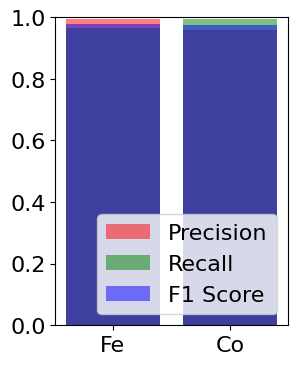

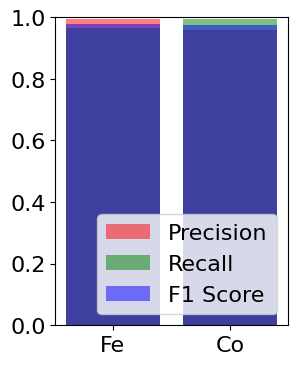

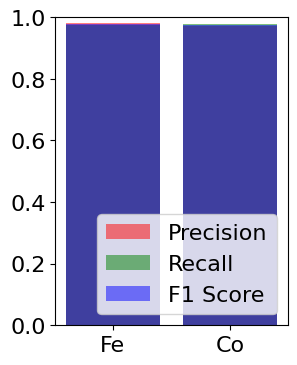

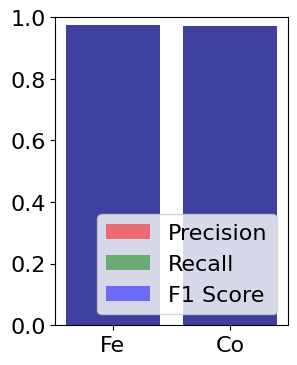

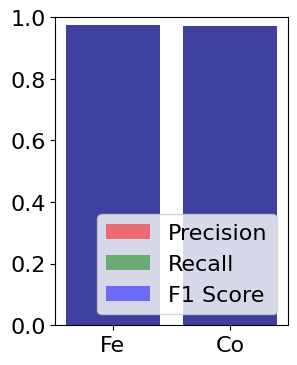

In [16]:
# Calculate the precision, recall, and F1 scores
precision_LR, recall_LR, f1_score_LR, _ = precision_recall_fscore_support(y_test, y_pred_LR, average=None)
precision_SVM, recall_SVM, f1_score_SVM, _ = precision_recall_fscore_support(y_test, y_pred_SVM, average=None)
precision_kNN, recall_kNN, f1_score_kNN, _ = precision_recall_fscore_support(y_test, y_pred_kNN, average=None)
precision_DT, recall_DT, f1_score_DT, _ = precision_recall_fscore_support(y_test, y_pred_DT, average=None)
precision_XGB, recall_XGB, f1_score_XGB, _ = precision_recall_fscore_support(y_test, y_pred_XGB, average=None)

# Define the labels for the two classes
plt.rcParams.update({'font.size': 16})
labels = ['Fe', 'Co']
# Plot the precision, recall, and F1 scores
plt.figure(figsize=(3, 4))
plt.bar(labels, precision_LR, color='r', alpha=0.5, label='Precision')
plt.bar(labels, recall_LR, color='g', alpha=0.5, label='Recall')
plt.bar(labels, f1_score_LR, color='b', alpha=0.5, label='F1 Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')  # place legend outside the figure
plt.savefig('./results/prec_rec_f1_lr.jpg', dpi=300, bbox_inches='tight')
plt.show()
# Plot the precision, recall, and F1 scores
plt.figure(figsize=(3, 4))
plt.bar(labels, precision_SVM, color='r', alpha=0.5, label='Precision')
plt.bar(labels, recall_SVM, color='g', alpha=0.5, label='Recall')
plt.bar(labels, f1_score_SVM, color='b', alpha=0.5, label='F1 Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')  # place legend outside the figure
plt.savefig('./results/prec_rec_f1_svm.jpg', dpi=300, bbox_inches='tight')
plt.show()
# Plot the precision, recall, and F1 scores
plt.figure(figsize=(3, 4))
plt.bar(labels, precision_kNN, color='r', alpha=0.5, label='Precision')
plt.bar(labels, recall_kNN, color='g', alpha=0.5, label='Recall')
plt.bar(labels, f1_score_kNN, color='b', alpha=0.5, label='F1 Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')  # place legend outside the figure
plt.savefig('./results/prec_rec_f1_knn.jpg', dpi=300, bbox_inches='tight')
plt.show()
# Plot the precision, recall, and F1 scores
plt.figure(figsize=(3, 4))
plt.bar(labels, precision_DT, color='r', alpha=0.5, label='Precision')
plt.bar(labels, recall_DT, color='g', alpha=0.5, label='Recall')
plt.bar(labels, f1_score_DT, color='b', alpha=0.5, label='F1 Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')  # place legend outside the figure
plt.savefig('./results/prec_rec_f1_dt.jpg', dpi=300, bbox_inches='tight')
plt.show()
# Plot the precision, recall, and F1 scores
plt.figure(figsize=(3, 4))
plt.bar(labels, precision_XGB, color='r', alpha=0.5, label='Precision')
plt.bar(labels, recall_XGB, color='g', alpha=0.5, label='Recall')
plt.bar(labels, f1_score_XGB, color='b', alpha=0.5, label='F1 Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')  # place legend outside the figure
plt.savefig('./results/prec_rec_f1_xgb.jpg', dpi=300, bbox_inches='tight')
plt.show()

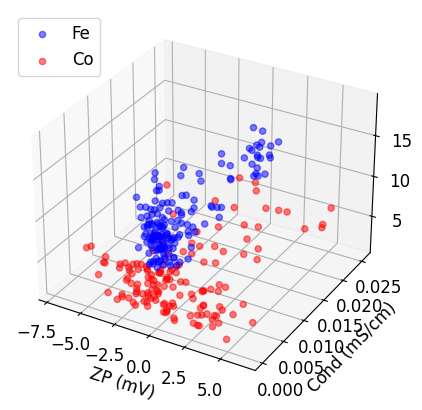

In [17]:
# Create the 3D scatter plot
pred = y_pred_LR
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
# ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,2], X_test[pred==0,3], c='blue', marker='o', label='Fe',alpha=0.5)
ax.scatter(X_test[pred==1,0], X_test[pred==1,2], X_test[pred==1,3], c='red', marker='o', label='Co',alpha=0.5)
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
# ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
# ax.set_box_aspect((1.5,1.5,1)) 
plt.savefig('./results/scatter_test_lr.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout
plt.show()


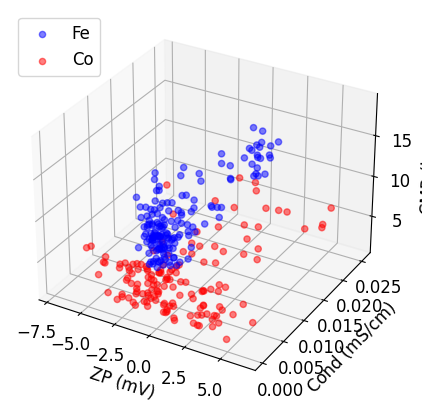

In [18]:
# Create the 3D scatter plot
pred = y_pred_SVM
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
# ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,2], X_test[pred==0,3], c='blue', marker='o', label='Fe',alpha=0.5)
ax.scatter(X_test[pred==1,0], X_test[pred==1,2], X_test[pred==1,3], c='red', marker='o', label='Co',alpha=0.5)
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
ax.set_zlabel('CMR (kcps)')
# ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
# ax.set_box_aspect((1.5,1.5,1)) 
plt.savefig('./results/scatter_test_svm.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout
plt.show()

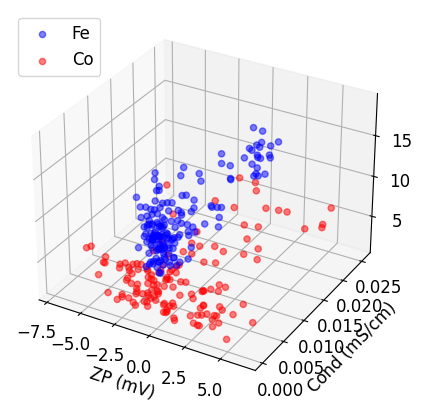

In [19]:
# Create the 3D scatter plot
pred = y_pred_kNN
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
# ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,2], X_test[pred==0,3], c='blue', marker='o', label='Fe',alpha=0.5)
ax.scatter(X_test[pred==1,0], X_test[pred==1,2], X_test[pred==1,3], c='red', marker='o', label='Co',alpha=0.5)
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
# ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
# ax.set_box_aspect((1.5,1.5,1)) 
plt.savefig('./results/scatter_test_knn.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout
plt.show()

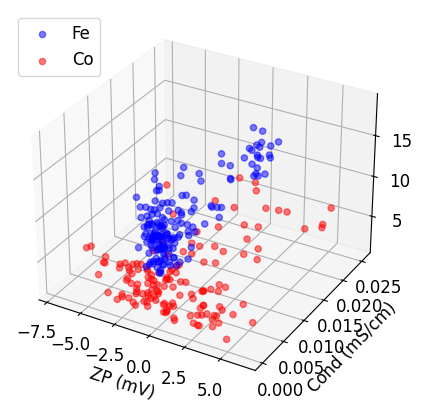

In [20]:
# Create the 3D scatter plot
pred = y_pred_DT
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
# ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,2], X_test[pred==0,3], c='blue', marker='o', label='Fe',alpha=0.5)
ax.scatter(X_test[pred==1,0], X_test[pred==1,2], X_test[pred==1,3], c='red', marker='o', label='Co',alpha=0.5)
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
# ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
# ax.set_box_aspect((1.5,1.5,1)) 
plt.savefig('./results/scatter_test_dt.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout
plt.show()

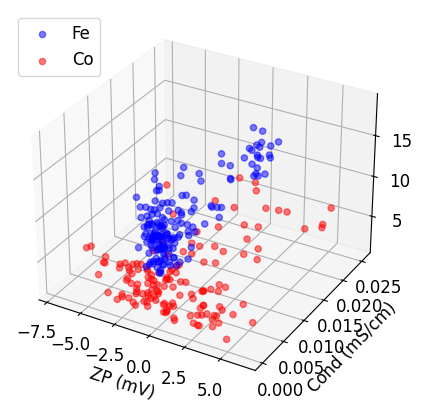

In [21]:
# Create the 3D scatter plot
pred = y_pred_XGB
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5,5))
# ax = plt.subplot(1,1,1,projection='3d')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test[pred==0,0], X_test[pred==0,2], X_test[pred==0,3], c='blue', marker='o', label='Fe',alpha=0.5)
ax.scatter(X_test[pred==1,0], X_test[pred==1,2], X_test[pred==1,3], c='red', marker='o', label='Co',alpha=0.5)
ax.set_xlabel('ZP (mV)')
ax.set_ylabel('Cond (mS/cm)')
# ax.tick_params("z", which="major",length=15,width = 2.0)
ax.legend(loc='upper left')
# ax.set_box_aspect((1.5,1.5,1)) 
plt.savefig('./results/scatter_test_xgb.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout
plt.show()
# print(sum(pred==0)) # double check the number